# 📦 CELLULE 1 : Imports et Configuration

In [32]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║                   MNIST - Analyse Exploratoire des Données               ║
║                                                                          ║
║  Objectif : Comprendre la structure et les caractéristiques du dataset  ║
║             MNIST avant l'entraînement de modèles                        ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

# ============================================================================
# IMPORTS
# ============================================================================

# Librairies standards
import numpy as np
import pandas as pd
from pathlib import Path
import time

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# PyTorch & Torchvision
import torch
from torchvision import datasets
import torchvision.transforms as transforms

# Scikit-Learn
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Réduction de dimensionnalité
import umap
import pacmap

# ============================================================================
# CONFIGURATION GLOBALE
# ============================================================================

# Style des graphiques
plt.style.use('default')
sns.set_palette("husl")

# Seed pour reproductibilité
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# ============================================================================
# CHEMINS DES FICHIERS
# ============================================================================

BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / 'data'
DATASET_DIR = BASE_DIR / 'dataset'
GRAPH_DIR = BASE_DIR / 'graphiques'

# Créer les dossiers nécessaires
DATA_DIR.mkdir(exist_ok=True)
DATASET_DIR.mkdir(exist_ok=True)
GRAPH_DIR.mkdir(exist_ok=True)

print("✅ Configuration terminée")
print(f"📂 Répertoire des données : {DATA_DIR}")
print(f"📂 Répertoire des datasets : {DATASET_DIR}")
print(f"📊 Répertoire des graphiques : {GRAPH_DIR}")


✅ Configuration terminée
📂 Répertoire des données : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\data
📂 Répertoire des datasets : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\dataset
📊 Répertoire des graphiques : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques


# 📊 CELLULE 2 : Chargement des Données

In [33]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║                         CHARGEMENT DES DONNÉES MNIST                     ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n" + "="*70)
print("📥 CHARGEMENT DES DONNÉES MNIST")
print("="*70)

# ============================================================================
# PARAMÈTRES DE CHARGEMENT
# ============================================================================

BATCH_SIZE = 20
NUM_WORKERS = 0
transform = transforms.ToTensor()

# ============================================================================
# TÉLÉCHARGEMENT ET CHARGEMENT
# ============================================================================

print("\n🔄 Téléchargement du dataset (si nécessaire)...")

# Train set
train_data = datasets.MNIST(
    root=DATASET_DIR,
    train=True,
    download=True,
    transform=transform
)

# Test set
test_data = datasets.MNIST(
    root=DATASET_DIR,
    train=False,
    download=True,
    transform=transform
)

# ============================================================================
# CONVERSION EN NUMPY
# ============================================================================

print("\n⚙️  Conversion en NumPy et normalisation...")

# Extraire les données et normaliser [0, 1]
X_train = train_data.data.numpy() / 255.0
Y_train = train_data.targets.numpy()

X_test = test_data.data.numpy() / 255.0
Y_test = test_data.targets.numpy()

# Aplatir pour analyses (28×28 → 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# ============================================================================
# RÉSUMÉ
# ============================================================================

print("\n" + "="*70)
print("✅ DONNÉES CHARGÉES ET PRÊTES")
print("="*70)
print(f"\n{'Dataset':<10} {'Shape (images)':<20} {'Shape (flat)':<20} {'Dtype'}")
print("-" * 70)
print(f"{'Train':<10} {str(X_train.shape):<20} {str(X_train_flat.shape):<20} {X_train.dtype}")
print(f"{'Test':<10} {str(X_test.shape):<20} {str(X_test_flat.shape):<20} {X_test.dtype}")
print("\n📊 Valeurs des pixels : [0.0, 1.0] (normalisées)")
print("="*70)



📥 CHARGEMENT DES DONNÉES MNIST

🔄 Téléchargement du dataset (si nécessaire)...

⚙️  Conversion en NumPy et normalisation...

✅ DONNÉES CHARGÉES ET PRÊTES

Dataset    Shape (images)       Shape (flat)         Dtype
----------------------------------------------------------------------
Train      (60000, 28, 28)      (60000, 784)         float64
Test       (10000, 28, 28)      (10000, 784)         float64

📊 Valeurs des pixels : [0.0, 1.0] (normalisées)


# 💾 CELLULE 3 : Création et Export des DataFrames

In [34]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║              CRÉATION DES DATAFRAMES ET EXPORT CSV                       ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n" + "="*70)
print("📊 CRÉATION DES DATAFRAMES")
print("="*70)

# ============================================================================
# CRÉATION DES DATAFRAMES
# ============================================================================

print("\n🔄 Construction des DataFrames...")

# DataFrame Train
df_train = pd.DataFrame(
    X_train_flat,
    columns=[f'pixel_{i}' for i in range(784)]
)
df_train['label'] = Y_train

# DataFrame Test
df_test = pd.DataFrame(
    X_test_flat,
    columns=[f'pixel_{i}' for i in range(784)]
)
df_test['label'] = Y_test

print(f"✅ DataFrames créés")
print(f"   Train : {df_train.shape}")
print(f"   Test  : {df_test.shape}")

# ============================================================================
# EXPORT EN CSV
# ============================================================================

print("\n💾 Sauvegarde en CSV...")

df_train.to_csv(DATA_DIR / 'mnist_train.csv', index=False)
df_test.to_csv(DATA_DIR / 'mnist_test.csv', index=False)

train_size = (DATA_DIR / 'mnist_train.csv').stat().st_size / 1024**2
test_size = (DATA_DIR / 'mnist_test.csv').stat().st_size / 1024**2

print(f"✅ Fichiers sauvegardés")
print(f"   {DATA_DIR / 'mnist_train.csv'} ({train_size:.2f} MB)")
print(f"   {DATA_DIR / 'mnist_test.csv'} ({test_size:.2f} MB)")
print("="*70)



📊 CRÉATION DES DATAFRAMES

🔄 Construction des DataFrames...
✅ DataFrames créés
   Train : (60000, 785)
   Test  : (10000, 785)

💾 Sauvegarde en CSV...
✅ Fichiers sauvegardés
   c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\data\mnist_train.csv (303.60 MB)
   c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\data\mnist_test.csv (50.72 MB)


# 📋 CELLULE 4 : Statistiques des Datasets


In [4]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║                   STATISTIQUES DES DATASETS                              ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

def print_dataset_stats(df, dataset_name="Dataset"):
    """
    Affiche les statistiques détaillées d'un dataset MNIST.
    
    Args:
        df (pd.DataFrame): DataFrame avec colonnes pixel_0...pixel_783 et label
        dataset_name (str): Nom du dataset pour l'affichage
    """
    print("\n" + "="*70)
    print(f"📊 {dataset_name.upper()} - STATISTIQUES")
    print("="*70)
    
    # Dimensions
    print(f"\n📏 Dimensions : {df.shape}")
    print(f"   • {df.shape[0]:,} images")
    print(f"   • {df.shape[1]:,} colonnes (784 pixels + 1 label)")
    
    # Distribution des labels
    label_counts = df['label'].value_counts().sort_index()
    label_percentages = (df['label'].value_counts(normalize=True).sort_index() * 100)
    
    print(f"\n📊 Distribution des labels :")
    print(f"{'Chiffre':<10} {'Count':<12} {'%':<10} {'Visualisation'}")
    print("-" * 70)
    
    for label in range(10):
        count = label_counts[label]
        percentage = label_percentages[label]
        bar = "█" * int(percentage / 2)  # 1% = 2 caractères
        print(f"{label:<10} {count:<12,} {percentage:>6.2f}%    {bar}")
    
    print("="*70)

# Afficher les statistiques
print_dataset_stats(df_train, "Train")
print_dataset_stats(df_test, "Test")



📊 TRAIN - STATISTIQUES

📏 Dimensions : (60000, 785)
   • 60,000 images
   • 785 colonnes (784 pixels + 1 label)

📊 Distribution des labels :
Chiffre    Count        %          Visualisation
----------------------------------------------------------------------
0          5,923          9.87%    ████
1          6,742         11.24%    █████
2          5,958          9.93%    ████
3          6,131         10.22%    █████
4          5,842          9.74%    ████
5          5,421          9.04%    ████
6          5,918          9.86%    ████
7          6,265         10.44%    █████
8          5,851          9.75%    ████
9          5,949          9.92%    ████

📊 TEST - STATISTIQUES

📏 Dimensions : (10000, 785)
   • 10,000 images
   • 785 colonnes (784 pixels + 1 label)

📊 Distribution des labels :
Chiffre    Count        %          Visualisation
----------------------------------------------------------------------
0          980            9.80%    ████
1          1,135         11.35%   

# 🎨 CELLULE 5 : Graphique - Batch de 20 Images


📊 Génération du graphique : Batch de 20 images aléatoires


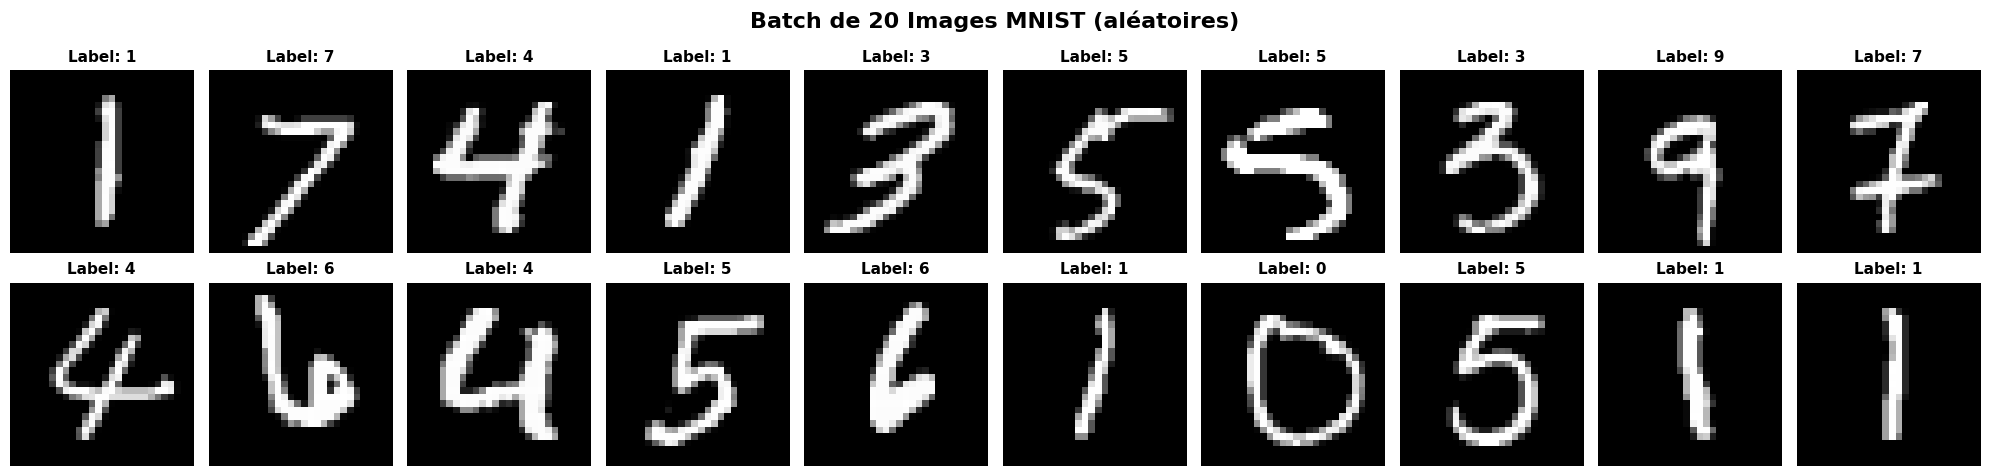

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_batch_20.png


In [6]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║                  GRAPHIQUE 1 : BATCH DE 20 IMAGES                        ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Batch de 20 images aléatoires")

# Créer le DataLoader
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

# Récupérer un batch
dataiter = iter(train_loader)
images, labels = next(dataiter)
images_np = images.numpy()

# Visualisation
fig, axes = plt.subplots(2, 10, figsize=(20, 5))
fig.suptitle('Batch de 20 Images MNIST (aléatoires)', 
             fontsize=16, fontweight='bold', y=0.98)

for idx, ax in enumerate(axes.flatten()):
    ax.imshow(np.squeeze(images_np[idx]), cmap='gray')
    ax.set_title(f'Label: {labels[idx].item()}', fontsize=11, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_batch_20.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_batch_20.png'}")

# 🔍 CELLULE 6 : Graphique - Image Annotée avec Valeurs


📊 Génération du graphique : Image annotée
✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_image_annotated.png


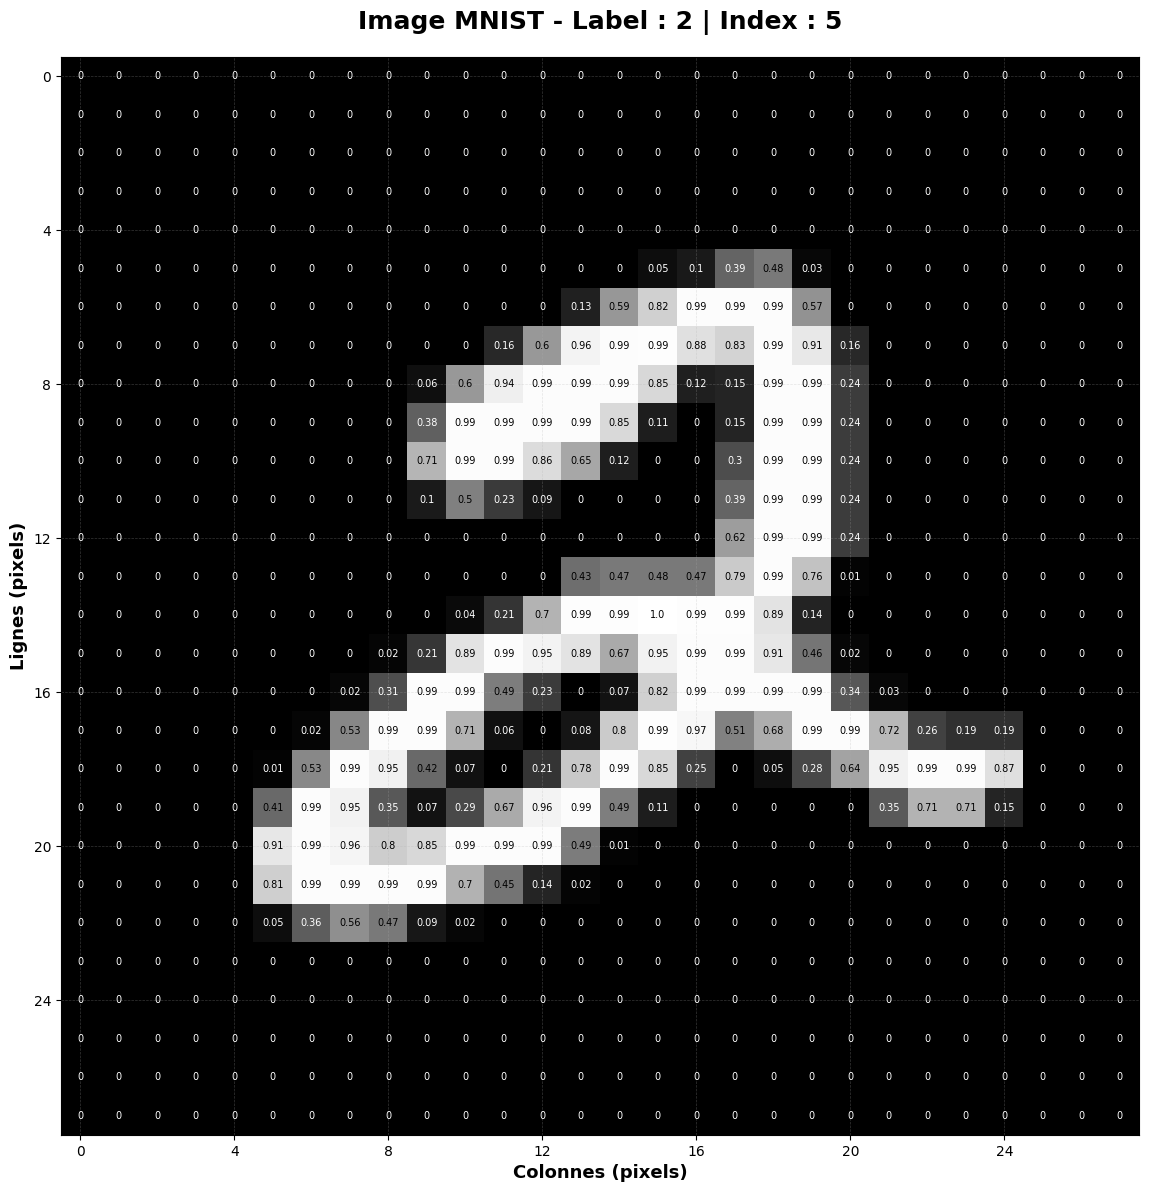

In [7]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║           GRAPHIQUE 2 : IMAGE AVEC VALEURS DE PIXELS ANNOTÉES           ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

def visualize_mnist_with_values(image_index, X_data, y_data, save_name=None):
    """
    Affiche une image MNIST avec les valeurs de pixels annotées.
    
    Args:
        image_index (int): Index de l'image à visualiser
        X_data (np.array): Données images (N, 28, 28)
        y_data (np.array): Labels
        save_name (str): Nom du fichier de sauvegarde (optionnel)
    """
    img = X_data[image_index]
    label = y_data[image_index]
    
    fig, ax = plt.subplots(figsize=(14, 14))
    ax.imshow(img, cmap='gray')
    
    # Seuil pour couleur du texte
    thresh = img.max() / 2.5
    
    # Annoter chaque pixel
    for x in range(28):
        for y in range(28):
            val = round(img[x, y], 2) if img[x, y] != 0 else 0
            text_color = 'white' if img[x, y] < thresh else 'black'
            
            ax.annotate(
                str(val),
                xy=(y, x),
                ha='center',
                va='center',
                color=text_color,
                fontsize=7,
                fontweight='normal'
            )
    
    ax.set_title(f'Image MNIST - Label : {int(label)} | Index : {image_index}',
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Colonnes (pixels)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Lignes (pixels)', fontsize=13, fontweight='bold')
    ax.set_xticks(range(0, 28, 4))
    ax.set_yticks(range(0, 28, 4))
    ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)
    
    if save_name:
        plt.savefig(GRAPH_DIR / save_name, dpi=150, bbox_inches='tight')
        print(f"✅ Graphique sauvegardé : {GRAPH_DIR / save_name}")
    
    plt.show()

# Visualiser l'image #5
print("\n📊 Génération du graphique : Image annotée")
visualize_mnist_with_values(5, X_train, Y_train, 'mnist_image_annotated.png')


# 📊 CELLULE 7 : Graphique - Distribution des Labels


📊 Génération du graphique : Distribution des labels


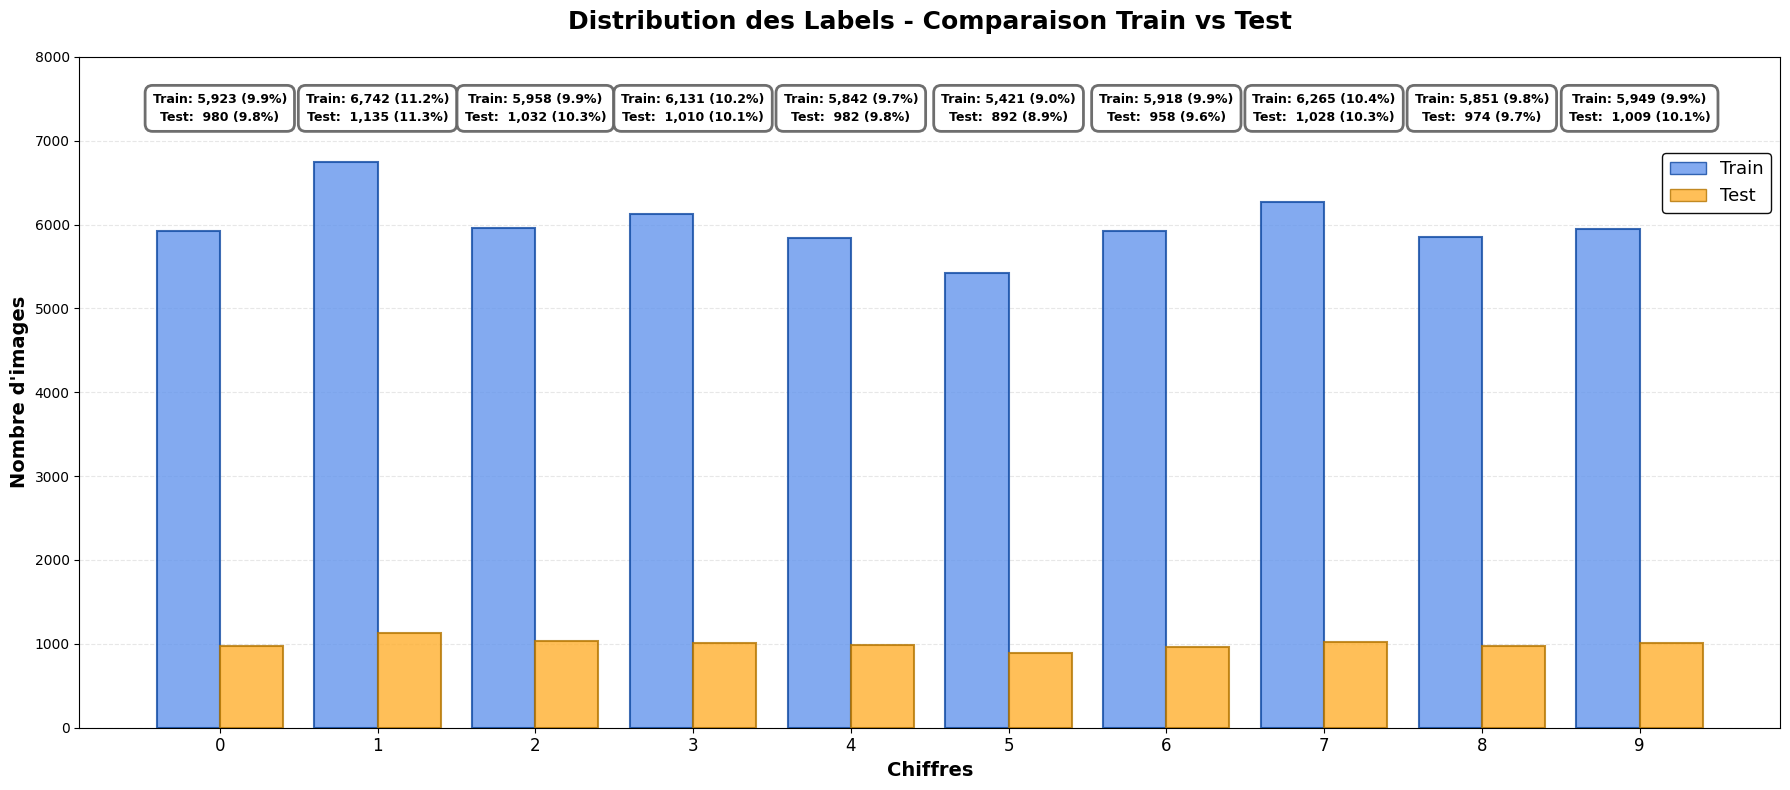

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_distribution_labels.png


In [13]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║             GRAPHIQUE 3 : DISTRIBUTION DES LABELS                        ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Distribution des labels")

# Calculer les statistiques
label_counts_train = df_train['label'].value_counts().sort_index()
label_percentages_train = (df_train['label'].value_counts(normalize=True).sort_index() * 100)

label_counts_test = df_test['label'].value_counts().sort_index()
label_percentages_test = (df_test['label'].value_counts(normalize=True).sort_index() * 100)

# Créer la figure
fig, ax = plt.subplots(figsize=(18, 8))

# Positions des barres
x = np.arange(10)
width = 0.4

# Barres groupées
bars_train = ax.bar(
    x - width/2, label_counts_train.values,
    width, color='#6495ED', alpha=0.8, 
    label='Train', edgecolor='#0d47a1', linewidth=1.5
)
bars_test = ax.bar(
    x + width/2, label_counts_test.values,
    width, color='#FFAF2E', alpha=0.8, 
    label='Test', edgecolor='#b37400', linewidth=1.5
)

# Configuration des axes
ax.set_xlabel('Chiffres', fontsize=14, fontweight='bold')
ax.set_ylabel('Nombre d\'images', fontsize=14, fontweight='bold')
ax.set_title('Distribution des Labels - Comparaison Train vs Test',
             fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(range(10), fontsize=12)
ax.set_ylim(0, 8000)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Annotations au-dessus des barres
y_annotation = 7200

for i in range(10):
    count_train = label_counts_train.values[i]
    pct_train = label_percentages_train.values[i]
    count_test = label_counts_test.values[i]
    pct_test = label_percentages_test.values[i]
    
    # Texte formaté
    info_text = (f'Train: {int(count_train):,} ({pct_train:.1f}%)\n'
                 f'Test:  {int(count_test):,} ({pct_test:.1f}%)')
    
    ax.text(i, y_annotation, info_text,
            ha='center', va='bottom',
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white', 
                     edgecolor='#666666', linewidth=2, alpha=0.95),
            linespacing=1.5)

# Légende
legend_elements = [
    Patch(facecolor='#6495ED', edgecolor='#0d47a1', alpha=0.8, label='Train'),
    Patch(facecolor='#FFAF2E', edgecolor='#b37400', alpha=0.8, label='Test')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=13, bbox_to_anchor=(1, 0.87), 
          framealpha=0.95, edgecolor='black')

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_distribution_labels.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_distribution_labels.png'}")


# 🎯 CELLULE 8 : Graphique - Images Moyennes (Prototypes)



📊 Génération du graphique : Prototypes (images moyennes)
✅ 10 prototypes calculés


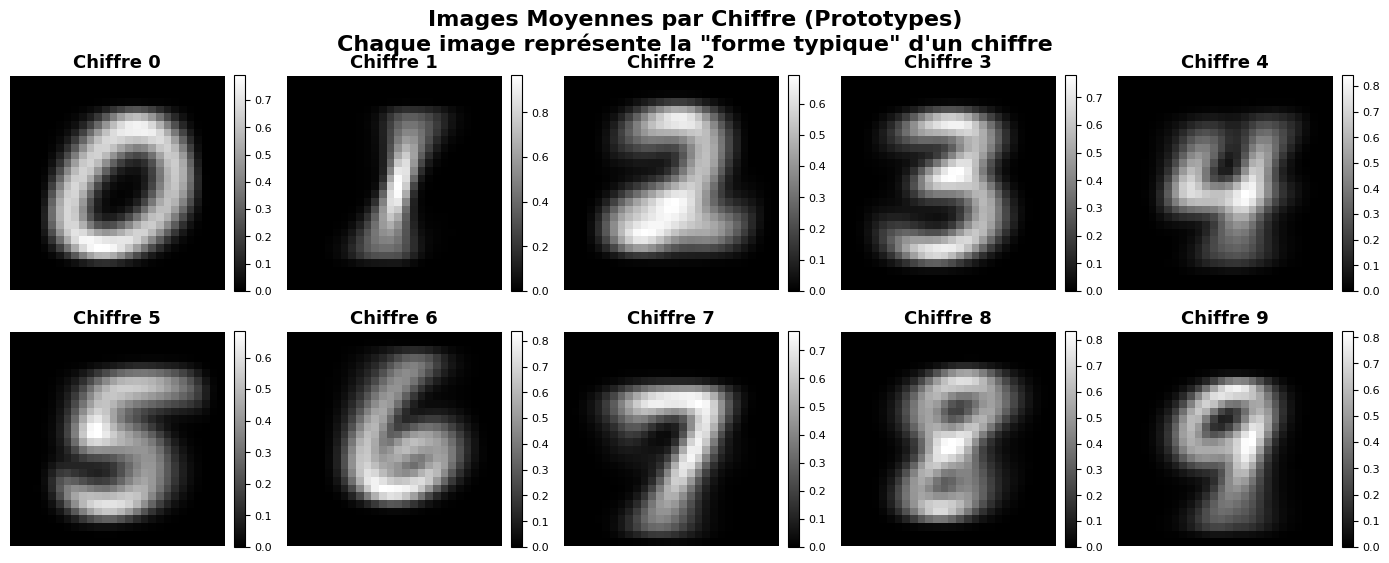

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_moyennes.png


In [20]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║             GRAPHIQUE 4 : IMAGES MOYENNES PAR CHIFFRE                    ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Prototypes (images moyennes)")

# Calculer les images moyennes pour chaque chiffre
mean_images = {}
for digit in range(10):
    digit_images = X_train[Y_train == digit]
    mean_images[digit] = np.mean(digit_images, axis=0)

print(f"✅ {len(mean_images)} prototypes calculés")

# Visualisation
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
fig.suptitle('Images Moyennes par Chiffre (Prototypes)\n'
             'Chaque image représente la "forme typique" d\'un chiffre',
             fontsize=16, fontweight='bold', y=0.95)

for digit, ax in enumerate(axes.flatten()):
    im = ax.imshow(mean_images[digit], cmap='gray')
    ax.set_title(f'Chiffre {digit}', fontsize=13, fontweight='bold')
    ax.axis('off')
    
    # Ajouter colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_prototypes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_moyennes.png'}")


# 🔥 CELLULE 9 : Graphique - Matrice de Similarité


📊 Génération du graphique : Matrice de similarité
✅ Matrice de similarité calculée ((10, 10))


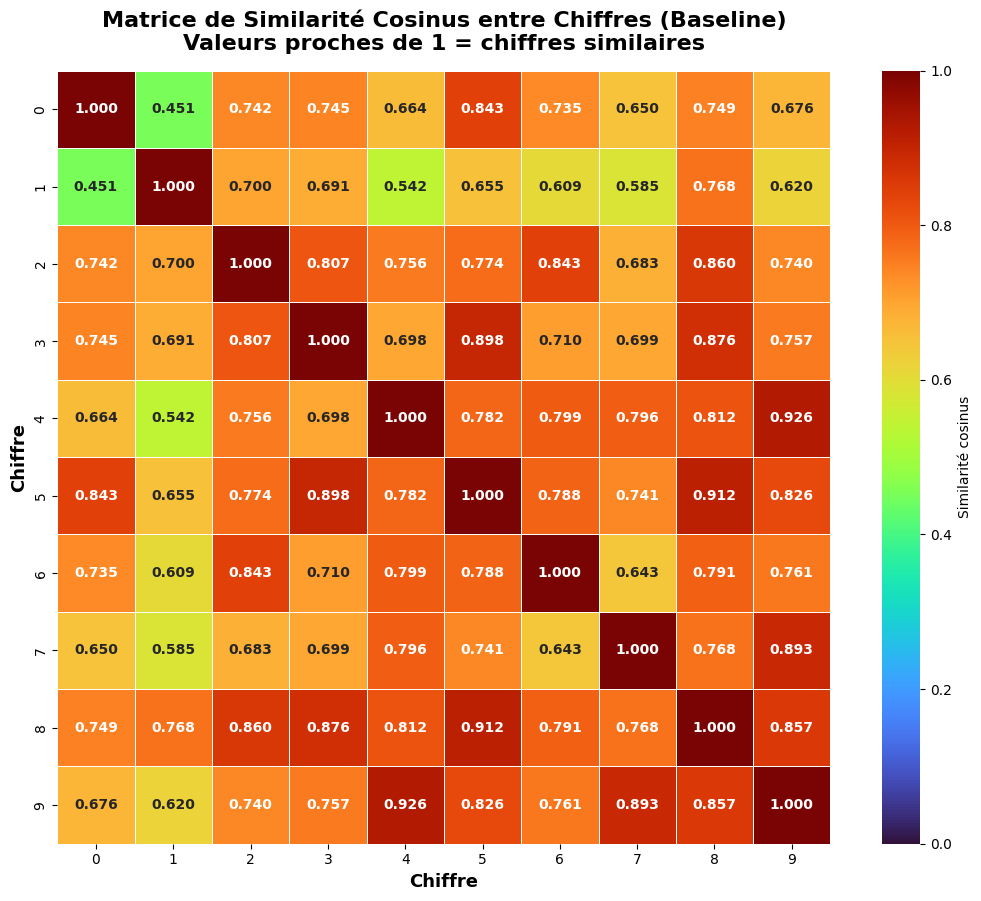


🔍 PAIRES LES PLUS SIMILAIRES (similarité > 0.75)
  Chiffres 4 ↔ 9 : 0.926
  Chiffres 5 ↔ 8 : 0.912
  Chiffres 3 ↔ 5 : 0.898
  Chiffres 7 ↔ 9 : 0.893
  Chiffres 3 ↔ 8 : 0.876
  Chiffres 2 ↔ 8 : 0.860
  Chiffres 8 ↔ 9 : 0.857
  Chiffres 2 ↔ 6 : 0.843
  Chiffres 0 ↔ 5 : 0.843
  Chiffres 5 ↔ 9 : 0.826
  Chiffres 4 ↔ 8 : 0.812
  Chiffres 2 ↔ 3 : 0.807
  Chiffres 4 ↔ 6 : 0.799
  Chiffres 4 ↔ 7 : 0.796
  Chiffres 6 ↔ 8 : 0.791
  Chiffres 5 ↔ 6 : 0.788
  Chiffres 4 ↔ 5 : 0.782
  Chiffres 2 ↔ 5 : 0.774
  Chiffres 1 ↔ 8 : 0.768
  Chiffres 7 ↔ 8 : 0.768
  Chiffres 6 ↔ 9 : 0.761
  Chiffres 3 ↔ 9 : 0.757
  Chiffres 2 ↔ 4 : 0.756

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_similarity_matrix.png


In [16]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║          GRAPHIQUE 5 : MATRICE DE SIMILARITÉ COSINUS                    ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Matrice de similarité")

def cosine_similarity_manual(prototypes):
    """
    Calcule la similarité cosinus entre prototypes.
    
    Formule: cos(A,B) = (A·B) / (||A|| × ||B||)
    
    Args:
        prototypes (np.array): Array de shape (n_classes, n_features)
    
    Returns:
        np.array: Matrice de similarité (n_classes, n_classes)
    """
    # Normaliser les vecteurs
    norms = np.linalg.norm(prototypes, axis=1, keepdims=True)
    prototypes_normalized = prototypes / norms
    
    # Produit matriciel
    similarity = prototypes_normalized @ prototypes_normalized.T
    
    return similarity

# Aplatir les prototypes
prototypes = np.array([mean_images[digit].flatten() for digit in range(10)])

# Calculer la similarité
similarity_matrix = cosine_similarity_manual(prototypes)

print(f"✅ Matrice de similarité calculée ({similarity_matrix.shape})")

# Visualisation
plt.figure(figsize=(11, 9))

sns.heatmap(
    similarity_matrix,
    annot=True,
    fmt='.3f',
    cmap='turbo',
    xticklabels=range(10),
    yticklabels=range(10),
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Similarité cosinus'},
    square=True,
    linewidths=0.5,
    annot_kws={'fontsize': 10, 'fontweight': 'bold'}
)

plt.title('Matrice de Similarité Cosinus entre Chiffres (Baseline)\n'
          'Valeurs proches de 1 = chiffres similaires',
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Chiffre', fontsize=13, fontweight='bold')
plt.ylabel('Chiffre', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_similarity_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Afficher les paires les plus similaires
print("\n" + "="*70)
print("🔍 PAIRES LES PLUS SIMILAIRES (similarité > 0.75)")
print("="*70)

similar_pairs = []
for i in range(10):
    for j in range(i+1, 10):
        sim = similarity_matrix[i, j]
        if sim > 0.75:
            similar_pairs.append((i, j, sim))

similar_pairs.sort(key=lambda x: x[2], reverse=True)

for i, j, sim in similar_pairs:
    print(f"  Chiffres {i} ↔ {j} : {sim:.3f}")

print(f"\n✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_similarity_matrix.png'}")


# 🧮 CELLULE 10 : Calcul de la Moyenne de Gris

In [36]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║               CALCUL DE LA MOYENNE DE GRIS PAR IMAGE                     ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n" + "="*70)
print("🧮 CALCUL DE LA MOYENNE DE GRIS")
print("="*70)

# Calculer la moyenne de gris pour chaque image
# (moyenne de tous les pixels d'une image)

# Train
df_train['moyenne_gris'] = df_train.iloc[:, :-1].mean(axis=1)

# Test
df_test['moyenne_gris'] = df_test.iloc[:, :-1].mean(axis=1)

print("\n✅ Moyenne de gris calculée pour chaque image")
print(f"\n📊 Statistiques Train :")
print(f"   • Moyenne globale : {df_train['moyenne_gris'].mean():.4f}")
print(f"   • Min : {df_train['moyenne_gris'].min():.4f}")
print(f"   • Max : {df_train['moyenne_gris'].max():.4f}")
print(f"   • Std : {df_train['moyenne_gris'].std():.4f}")

print(f"\n📊 Statistiques Test :")
print(f"   • Moyenne globale : {df_test['moyenne_gris'].mean():.4f}")
print(f"   • Min : {df_test['moyenne_gris'].min():.4f}")
print(f"   • Max : {df_test['moyenne_gris'].max():.4f}")
print(f"   • Std : {df_test['moyenne_gris'].std():.4f}")

print("="*70)


🧮 CALCUL DE LA MOYENNE DE GRIS

✅ Moyenne de gris calculée pour chaque image

📊 Statistiques Train :
   • Moyenne globale : 0.1307
   • Min : 0.0254
   • Max : 0.3976
   • Std : 0.0433

📊 Statistiques Test :
   • Moyenne globale : 0.1325
   • Min : 0.0281
   • Max : 0.3272
   • Std : 0.0437


# 🎻 CELLULE 11 : Graphique - Violin Plot Moyenne de Gris


📊 Génération du graphique : Violin plot moyenne de gris


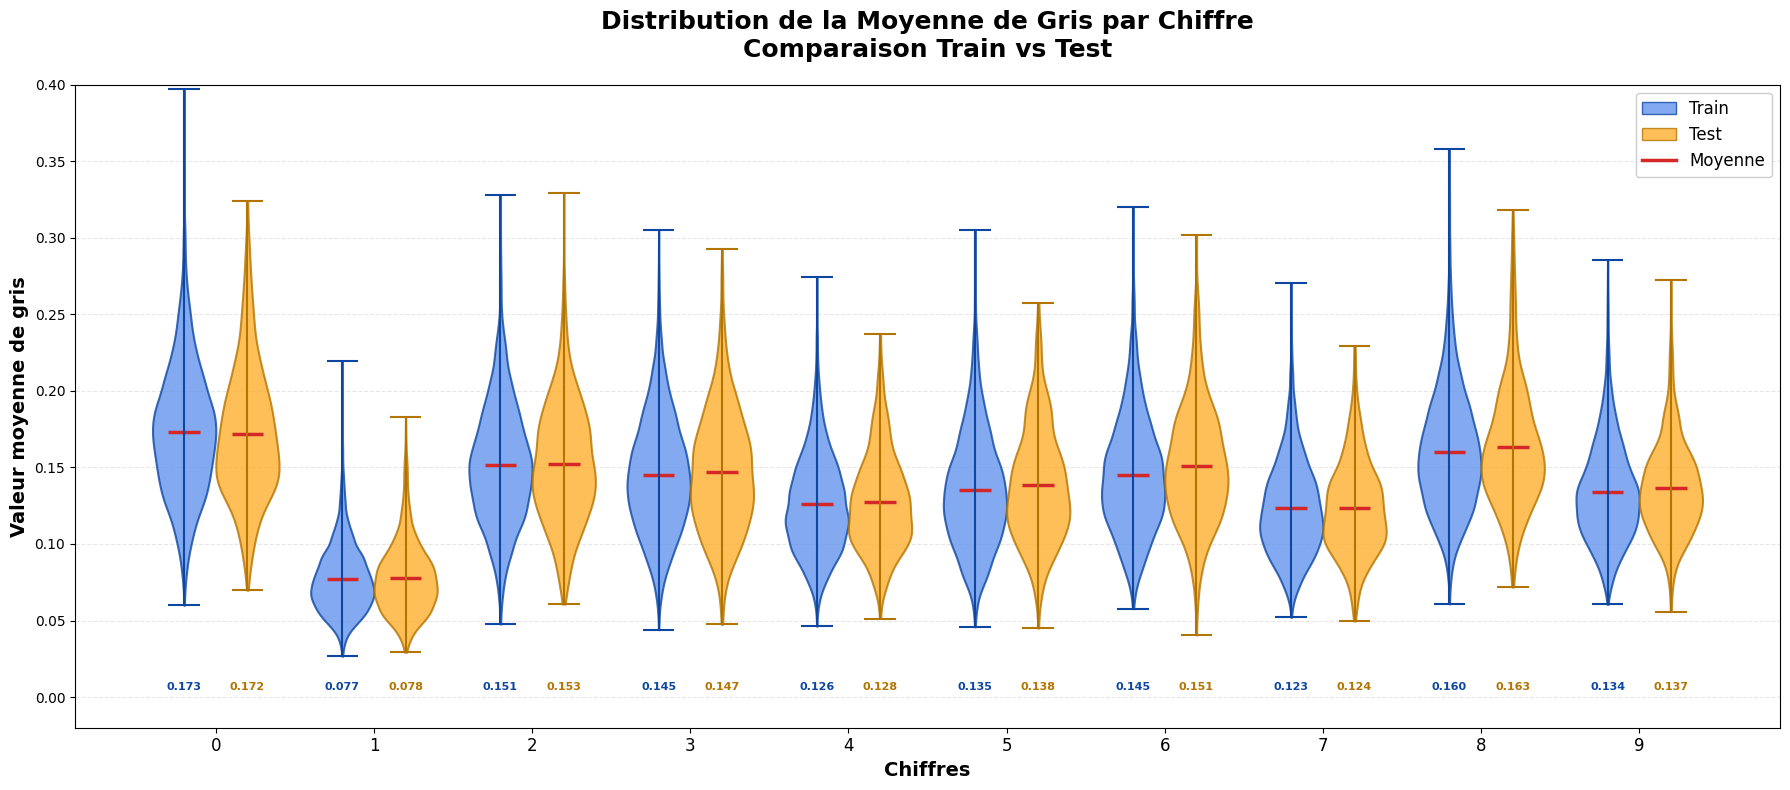

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_violin_moyenne_gris.png


In [22]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║     GRAPHIQUE 6 : DISTRIBUTION MOYENNE DE GRIS (VIOLIN PLOT)            ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Violin plot moyenne de gris")

# Préparer les données par chiffre
data_violin_train = [df_train[df_train['label'] == i]['moyenne_gris'].values 
                     for i in range(10)]
data_violin_test = [df_test[df_test['label'] == i]['moyenne_gris'].values 
                    for i in range(10)]

# Créer le plot
fig, ax = plt.subplots(figsize=(18, 8))

# Positions alternées
x = np.arange(10)
width = 0.4

positions_train = x - width/2
positions_test = x + width/2

# Violin plot Train
parts_train = ax.violinplot(
    data_violin_train,
    positions=positions_train,
    showmeans=True,
    widths=width,
    showextrema=True
)

# Violin plot Test
parts_test = ax.violinplot(
    data_violin_test,
    positions=positions_test,
    showmeans=True,
    widths=width,
    showextrema=True
)

# Customiser Train (Bleu)
for pc in parts_train['bodies']:
    pc.set_facecolor('#6495ED')
    pc.set_edgecolor('#0d47a1')
    pc.set_alpha(0.8)
    pc.set_linewidth(1.5)

parts_train['cmeans'].set_color('#d62728')
parts_train['cmeans'].set_linewidth(2.5)
parts_train['cbars'].set_color('#0d47a1')
parts_train['cmaxes'].set_color('#0d47a1')
parts_train['cmins'].set_color('#0d47a1')

# Customiser Test (Orange)
for pc in parts_test['bodies']:
    pc.set_facecolor('#FFAF2E')
    pc.set_edgecolor('#b37400')
    pc.set_alpha(0.8)
    pc.set_linewidth(1.5)

parts_test['cmeans'].set_color('#d62728')
parts_test['cmeans'].set_linewidth(2.5)
parts_test['cbars'].set_color('#b37400')
parts_test['cmaxes'].set_color('#b37400')
parts_test['cmins'].set_color('#b37400')

# Annotations des moyennes
for i in range(10):
    mean_train = np.mean(data_violin_train[i])
    mean_test = np.mean(data_violin_test[i])
    
    ax.text(positions_train[i], 0.01, f'{mean_train:.3f}',
            ha='center', va='top', fontsize=8, 
            color='#0d47a1', fontweight='bold')
    
    ax.text(positions_test[i], 0.01, f'{mean_test:.3f}',
            ha='center', va='top', fontsize=8, 
            color='#b37400', fontweight='bold')

# Configuration
ax.set_xlabel('Chiffres', fontsize=14, fontweight='bold')
ax.set_ylabel('Valeur moyenne de gris', fontsize=14, fontweight='bold')
ax.set_title('Distribution de la Moyenne de Gris par Chiffre\n'
             'Comparaison Train vs Test',
             fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(range(10), fontsize=12)
ax.set_ylim(-0.02, 0.40)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Légende
legend_elements = [
    Patch(facecolor='#6495ED', edgecolor='#0d47a1', alpha=0.8, label='Train'),
    Patch(facecolor='#FFAF2E', edgecolor='#b37400', alpha=0.8, label='Test'),
    plt.Line2D([0], [0], color='#d62728', linewidth=2.5, label='Moyenne'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12, framealpha=0.95)

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_violin_moyenne_gris.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_violin_moyenne_gris.png'}")


# 🌡️ CELLULE 12 : Graphique - Variance Spatiale



📊 Génération du graphique : Variance spatiale
✅ Variance calculée pour 784 pixels


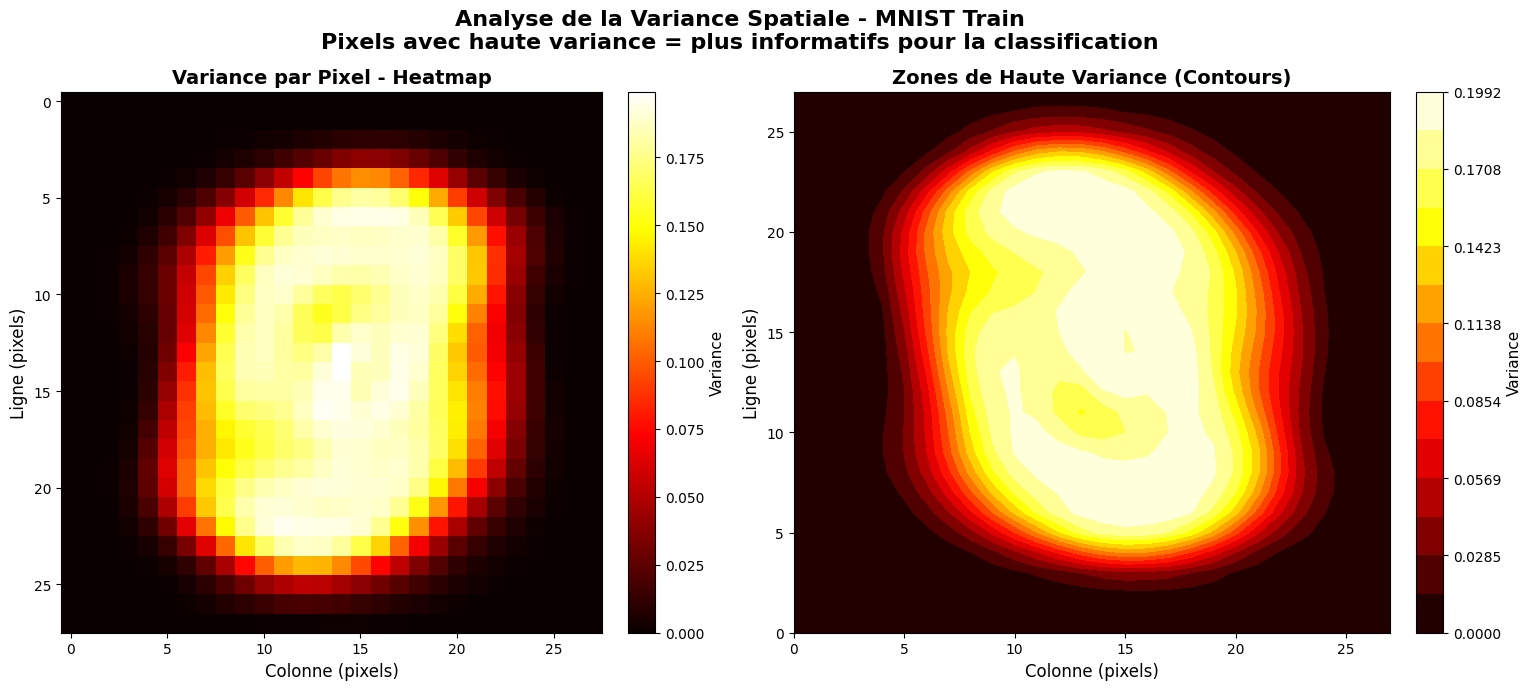


📊 STATISTIQUES DE LA VARIANCE SPATIALE
Variance globale : 0.067252
Min variance     : 0.000000
Max variance     : 0.199210
Std variance     : 0.076553

🔝 Top 10 pixels les PLUS informatifs (haute variance) :
   Pixel (13, 14) : variance = 0.199210
   Pixel (14, 14) : variance = 0.198910
   Pixel (16, 13) : variance = 0.196118
   Pixel (22, 11) : variance = 0.195872
   Pixel (16, 14) : variance = 0.195137
   Pixel (15, 14) : variance = 0.195039
   Pixel (15, 17) : variance = 0.195031
   Pixel (15, 13) : variance = 0.195012
   Pixel (22, 12) : variance = 0.194466
   Pixel (14, 17) : variance = 0.194218

🔻 Top 10 pixels les MOINS informatifs (basse variance) :
   Pixel ( 0,  0) : variance = 0.000000
   Pixel ( 0,  1) : variance = 0.000000
   Pixel ( 0,  2) : variance = 0.000000
   Pixel ( 0,  3) : variance = 0.000000
   Pixel ( 0,  4) : variance = 0.000000
   Pixel ( 0,  5) : variance = 0.000000
   Pixel ( 0,  6) : variance = 0.000000
   Pixel ( 0,  7) : variance = 0.000000
   Pixel ( 0,

In [23]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║            GRAPHIQUE 7 : ANALYSE DE LA VARIANCE SPATIALE                 ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Variance spatiale")

# Calculer la variance par pixel
pixel_variance = df_train.iloc[:, :-2].var()  # Exclure 'label' et 'moyenne_gris'
variance_grid = pixel_variance.values.reshape(28, 28)

print(f"✅ Variance calculée pour {len(pixel_variance)} pixels")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Analyse de la Variance Spatiale - MNIST Train\n'
             'Pixels avec haute variance = plus informatifs pour la classification',
             fontsize=16, fontweight='bold', y=0.98)

# Heatmap
im1 = axes[0].imshow(variance_grid, cmap='hot', interpolation='nearest')
axes[0].set_title('Variance par Pixel - Heatmap', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Colonne (pixels)', fontsize=12)
axes[0].set_ylabel('Ligne (pixels)', fontsize=12)
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label('Variance', fontsize=11)

# Contour plot
levels = np.linspace(variance_grid.min(), variance_grid.max(), 15)
contour = axes[1].contourf(variance_grid, levels=levels, cmap='hot')
axes[1].set_title('Zones de Haute Variance (Contours)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Colonne (pixels)', fontsize=12)
axes[1].set_ylabel('Ligne (pixels)', fontsize=12)
cbar2 = plt.colorbar(contour, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label('Variance', fontsize=11)

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_variance_spatiale.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistiques
print("\n" + "="*70)
print("📊 STATISTIQUES DE LA VARIANCE SPATIALE")
print("="*70)
print(f"Variance globale : {pixel_variance.mean():.6f}")
print(f"Min variance     : {pixel_variance.min():.6f}")
print(f"Max variance     : {pixel_variance.max():.6f}")
print(f"Std variance     : {pixel_variance.std():.6f}")

# Top pixels informatifs
top_k = 10
print(f"\n🔝 Top {top_k} pixels les PLUS informatifs (haute variance) :")
for idx_name, var in pixel_variance.nlargest(top_k).items():
    idx = int(idx_name.split('_')[1])
    row, col = divmod(idx, 28)
    print(f"   Pixel ({row:2d}, {col:2d}) : variance = {var:.6f}")

print(f"\n🔻 Top {top_k} pixels les MOINS informatifs (basse variance) :")
for idx_name, var in pixel_variance.nsmallest(top_k).items():
    idx = int(idx_name.split('_')[1])
    row, col = divmod(idx, 28)
    print(f"   Pixel ({row:2d}, {col:2d}) : variance = {var:.6f}")

print(f"\n✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_variance_spatiale.png'}")


# 🚨 CELLULE 13 : Détection des Outliers

In [24]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║                  IDENTIFICATION DES IMAGES OUTLIERS                      ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n" + "="*70)
print("🔍 DÉTECTION DES OUTLIERS (Méthode IQR)")
print("="*70)

# Méthode IQR (Interquartile Range)
Q1 = df_train['moyenne_gris'].quantile(0.25)
Q3 = df_train['moyenne_gris'].quantile(0.75)
IQR = Q3 - Q1

# Seuils (2× IQR pour outliers modérés)
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Identifier les outliers
outliers_idx = df_train[
    (df_train['moyenne_gris'] < lower_bound) | 
    (df_train['moyenne_gris'] > upper_bound)
].index

print(f"\n📊 Résultats :")
print(f"   • Q1 (25e percentile)   : {Q1:.4f}")
print(f"   • Q3 (75e percentile)   : {Q3:.4f}")
print(f"   • IQR (Q3 - Q1)         : {IQR:.4f}")
print(f"   • Seuil inférieur       : {lower_bound:.4f}")
print(f"   • Seuil supérieur       : {upper_bound:.4f}")
print(f"\n   • Nombre d'outliers     : {len(outliers_idx):,}")
print(f"   • Pourcentage           : {len(outliers_idx) / len(df_train) * 100:.2f}%")

# Distribution par chiffre
print(f"\n📊 Outliers par chiffre :")
for digit in range(10):
    digit_outliers = df_train.loc[outliers_idx][df_train.loc[outliers_idx, 'label'] == digit]
    print(f"   Chiffre {digit} : {len(digit_outliers):3d} outliers")

print("="*70)



🔍 DÉTECTION DES OUTLIERS (Méthode IQR)

📊 Résultats :
   • Q1 (25e percentile)   : 0.1057
   • Q3 (75e percentile)   : 0.1635
   • IQR (Q3 - Q1)         : 0.0578
   • Seuil inférieur       : -0.0100
   • Seuil supérieur       : 0.2792

   • Nombre d'outliers     : 127
   • Pourcentage           : 0.21%

📊 Outliers par chiffre :
   Chiffre 0 :  69 outliers
   Chiffre 1 :   0 outliers
   Chiffre 2 :   9 outliers
   Chiffre 3 :   6 outliers
   Chiffre 4 :   0 outliers
   Chiffre 5 :   4 outliers
   Chiffre 6 :   8 outliers
   Chiffre 7 :   0 outliers
   Chiffre 8 :  30 outliers
   Chiffre 9 :   1 outliers


# 🌓 CELLULE 14 : Graphique - Images Sombres vs Claires


📊 Génération du graphique : 5 plus sombres vs 5 plus claires


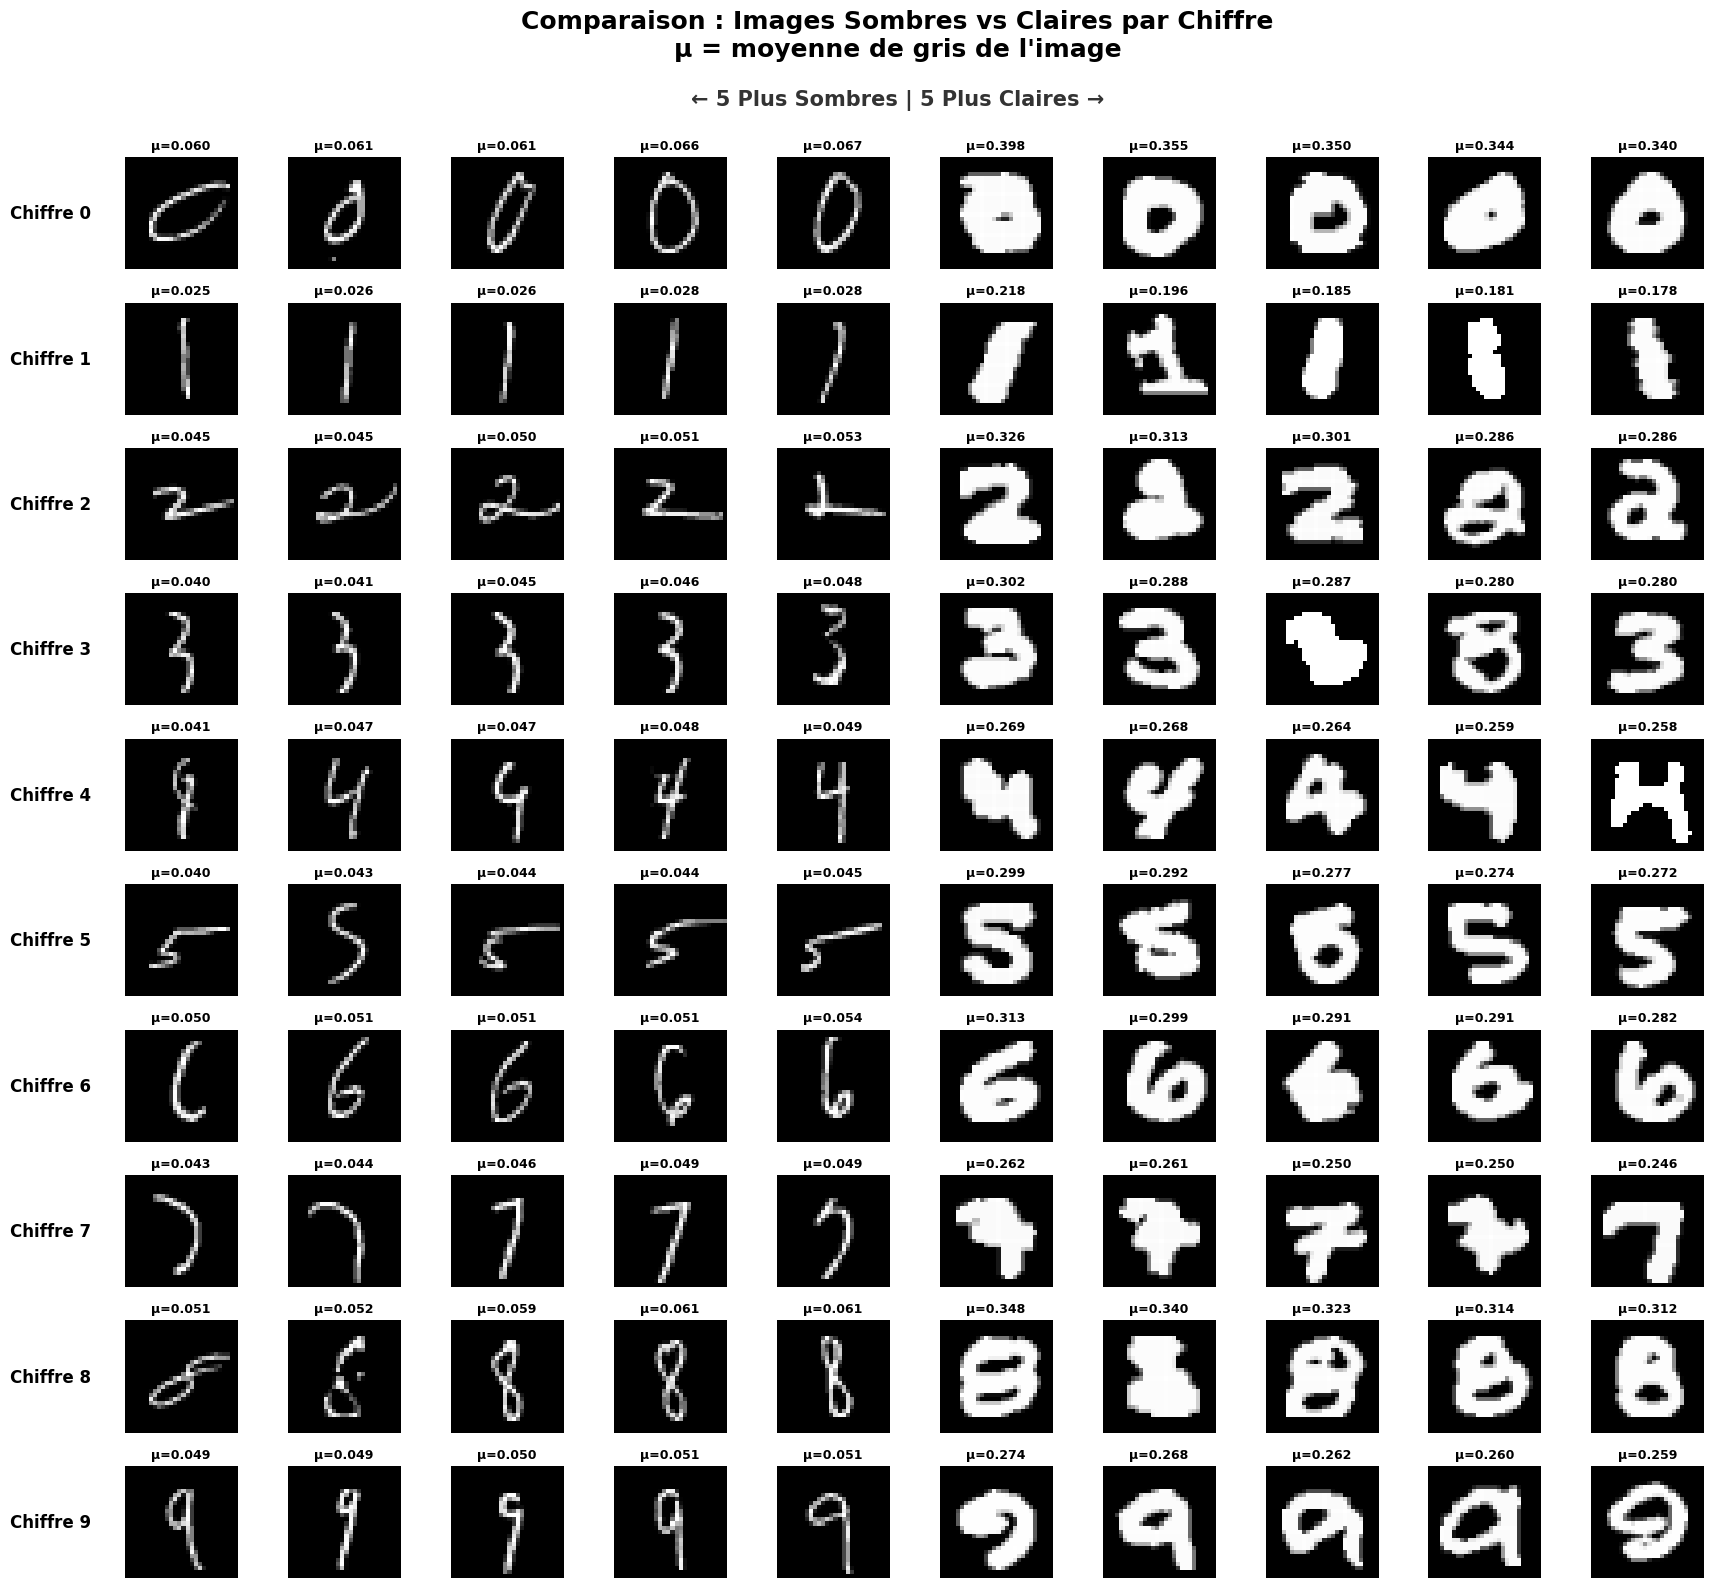

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_sombres_vs_claires.png


In [46]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║        GRAPHIQUE 8 : IMAGES SOMBRES VS CLAIRES PAR CHIFFRE              ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : 5 plus sombres vs 5 plus claires")

fig, axes = plt.subplots(10, 10, figsize=(18, 16))

for digit in range(10):
    digit_data = df_train[df_train['label'] == digit]
    
    # 5 plus sombres (moyenne de gris la plus faible)
    darkest_idx = digit_data['moyenne_gris'].nsmallest(5).index
    
    # 5 plus claires (moyenne de gris la plus élevée)
    lightest_idx = digit_data['moyenne_gris'].nlargest(5).index
    
    # Afficher les sombres (colonnes 0-4)
    for i, idx in enumerate(darkest_idx):
        ax = axes[digit, i]
        ax.imshow(X_train[idx], cmap='gray')
        moy = df_train.iloc[idx]['moyenne_gris']
        ax.set_title(f'μ={moy:.3f}', fontsize=9, fontweight='bold')
        ax.axis('off')
    
    # Afficher les claires (colonnes 5-9)
    for i, idx in enumerate(lightest_idx):
        ax = axes[digit, i + 5]
        ax.imshow(X_train[idx], cmap='gray')
        moy = df_train.iloc[idx]['moyenne_gris']
        ax.set_title(f'μ={moy:.3f}', fontsize=9, fontweight='bold')
        ax.axis('off')
    
    # Label de la ligne (chiffre)
    axes[digit, 0].text(-0.3, 0.5, f'Chiffre {digit}',
                        transform=axes[digit, 0].transAxes,
                        fontsize=12, fontweight='bold', 
                        va='center', ha='right')

# Labels de colonnes
fig.text(0.53, 0.93, '← 5 Plus Sombres | 5 Plus Claires →', 
         ha='center', fontsize=15, fontweight='bold', color='#333')

plt.suptitle('Comparaison : Images Sombres vs Claires par Chiffre\n'
             'μ = moyenne de gris de l\'image',
             fontsize=18, fontweight='bold', x=0.53, y=0.99)

plt.tight_layout(rect=[0.02, 0, 1, 0.96])
plt.savefig(GRAPH_DIR / 'mnist_sombres_vs_claires.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_sombres_vs_claires.png'}")


# 🗺️ CELLULE 15 : Calcul t-SNE, UMAP, PaCMAP


In [26]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║         RÉDUCTION DE DIMENSIONNALITÉ : t-SNE, UMAP, PaCMAP              ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n" + "="*70)
print("🗺️  RÉDUCTION DE DIMENSIONNALITÉ - BASELINE")
print("="*70)

# ============================================================================
# PRÉPARATION DES DONNÉES
# ============================================================================

print("\n📊 Préparation des données...")
print(f"   X_test shape : {X_test.shape}")
print(f"   Y_test shape : {Y_test.shape}")

# Aplatir les images 28×28 → 784
embeddings_raw = X_test.reshape(X_test.shape[0], -1)
y_true = Y_test

print(f"✅ Données aplaties")
print(f"   embeddings_raw shape : {embeddings_raw.shape}")

# ============================================================================
# APPLICATION DES 3 MÉTHODES
# ============================================================================

print(f"\n" + "="*70)
print("⏳ APPLICATION DES MÉTHODES (estimation : 2-3 minutes)")
print("="*70)

results_raw = {}

# t-SNE
print(f"\n🔄 [1/3] t-SNE en cours...")
start = time.time()
tsne_raw = TSNE(
    n_components=2, 
    random_state=RANDOM_SEED, 
    perplexity=30, 
    max_iter=1000, 
    verbose=0
)
embeddings_tsne_raw = tsne_raw.fit_transform(embeddings_raw)
time_tsne_raw = time.time() - start
results_raw['t-SNE'] = {'data': embeddings_tsne_raw, 'time': time_tsne_raw}
print(f"   ✅ t-SNE terminé en {time_tsne_raw:.2f}s")

# UMAP
print(f"\n🔄 [2/3] UMAP en cours...")
start = time.time()
reducer_umap_raw = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=RANDOM_SEED,
    verbose=False
)
embeddings_umap_raw = reducer_umap_raw.fit_transform(embeddings_raw)
time_umap_raw = time.time() - start
results_raw['UMAP'] = {'data': embeddings_umap_raw, 'time': time_umap_raw}
print(f"   ✅ UMAP terminé en {time_umap_raw:.2f}s")

# PaCMAP
print(f"\n🔄 [3/3] PaCMAP en cours...")
start = time.time()
reducer_pacmap_raw = pacmap.PaCMAP(
    n_components=2,
    n_neighbors=15,
    MN_ratio=0.5,
    FP_ratio=2.0,
    random_state=RANDOM_SEED,
    verbose=False
)
embeddings_pacmap_raw = reducer_pacmap_raw.fit_transform(embeddings_raw, init="pca")
time_pacmap_raw = time.time() - start
results_raw['PaCMAP'] = {'data': embeddings_pacmap_raw, 'time': time_pacmap_raw}
print(f"   ✅ PaCMAP terminé en {time_pacmap_raw:.2f}s")

# ============================================================================
# CALCUL DES MÉTRIQUES
# ============================================================================

print(f"\n📊 Calcul des métriques de clustering...")

metrics_raw = {}
for name, result in results_raw.items():
    data = result['data']
    sil = silhouette_score(data, y_true)
    db = davies_bouldin_score(data, y_true)
    metrics_raw[name] = {
        'silhouette': sil,
        'davies_bouldin': db,
        'time': result['time']
    }

# Tableau comparatif
print(f"\n" + "="*70)
print("📊 ANALYSE QUANTITATIVE")
print("="*70)
print(f"\n{'Méthode':<10} {'Silhouette':<15} {'Davies-B':<15} {'Temps (s)':<12} {'Qualité'}")
print("-" * 70)

for method in ['t-SNE', 'UMAP', 'PaCMAP']:
    scores = metrics_raw[method]
    sil = scores['silhouette']
    db = scores['davies_bouldin']
    t = scores['time']
    
    quality = ("🥇 Excellente" if sil > 0.5 else 
               "🥈 Très bonne" if sil > 0.4 else 
               "🥉 Bonne" if sil > 0.3 else 
               "⚠️  Modérée")
    
    print(f"{method:<10} {sil:>6.4f} {'':8} {db:>6.4f} {'':8} {t:>6.2f} {'':5} {quality}")

# Classements
best_quality = max(metrics_raw.items(), key=lambda x: x[1]['silhouette'])
fastest = min(metrics_raw.items(), key=lambda x: x[1]['time'])
best_db = min(metrics_raw.items(), key=lambda x: x[1]['davies_bouldin'])

print(f"\n🏆 CLASSEMENTS :")
print(f"   Meilleure séparation : {best_quality[0]} (Silhouette = {best_quality[1]['silhouette']:.4f})")
print(f"   Plus rapide          : {fastest[0]} ({fastest[1]['time']:.2f}s)")
print(f"   Meilleur DB Index    : {best_db[0]} ({best_db[1]['davies_bouldin']:.4f})")

print("="*70)



🗺️  RÉDUCTION DE DIMENSIONNALITÉ - BASELINE

📊 Préparation des données...
   X_test shape : (10000, 28, 28)
   Y_test shape : (10000,)
✅ Données aplaties
   embeddings_raw shape : (10000, 784)

⏳ APPLICATION DES MÉTHODES (estimation : 2-3 minutes)

🔄 [1/3] t-SNE en cours...
   ✅ t-SNE terminé en 27.85s

🔄 [2/3] UMAP en cours...


c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


   ✅ UMAP terminé en 34.32s

🔄 [3/3] PaCMAP en cours...
   ✅ PaCMAP terminé en 6.79s

📊 Calcul des métriques de clustering...

📊 ANALYSE QUANTITATIVE

Méthode    Silhouette      Davies-B        Temps (s)    Qualité
----------------------------------------------------------------------
t-SNE      0.3628          1.1570           27.85       🥉 Bonne
UMAP       0.4221          1.0218           34.32       🥈 Très bonne
PaCMAP     0.4679          1.2040            6.79       🥈 Très bonne

🏆 CLASSEMENTS :
   Meilleure séparation : PaCMAP (Silhouette = 0.4679)
   Plus rapide          : PaCMAP (6.79s)
   Meilleur DB Index    : UMAP (1.0218)


# 🎨 CELLULE 16 : Graphique - Comparaison 1×3


📊 Génération du graphique : Comparaison 1×3


C:\Users\romua\AppData\Local\Temp\ipykernel_26904\1458727734.py:47: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\romua\AppData\Local\Temp\ipykernel_26904\1458727734.py:48: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.savefig(GRAPH_DIR / 'mnist_reduction_comparison_1x3.png', dpi=300, bbox_inches='tight')
c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


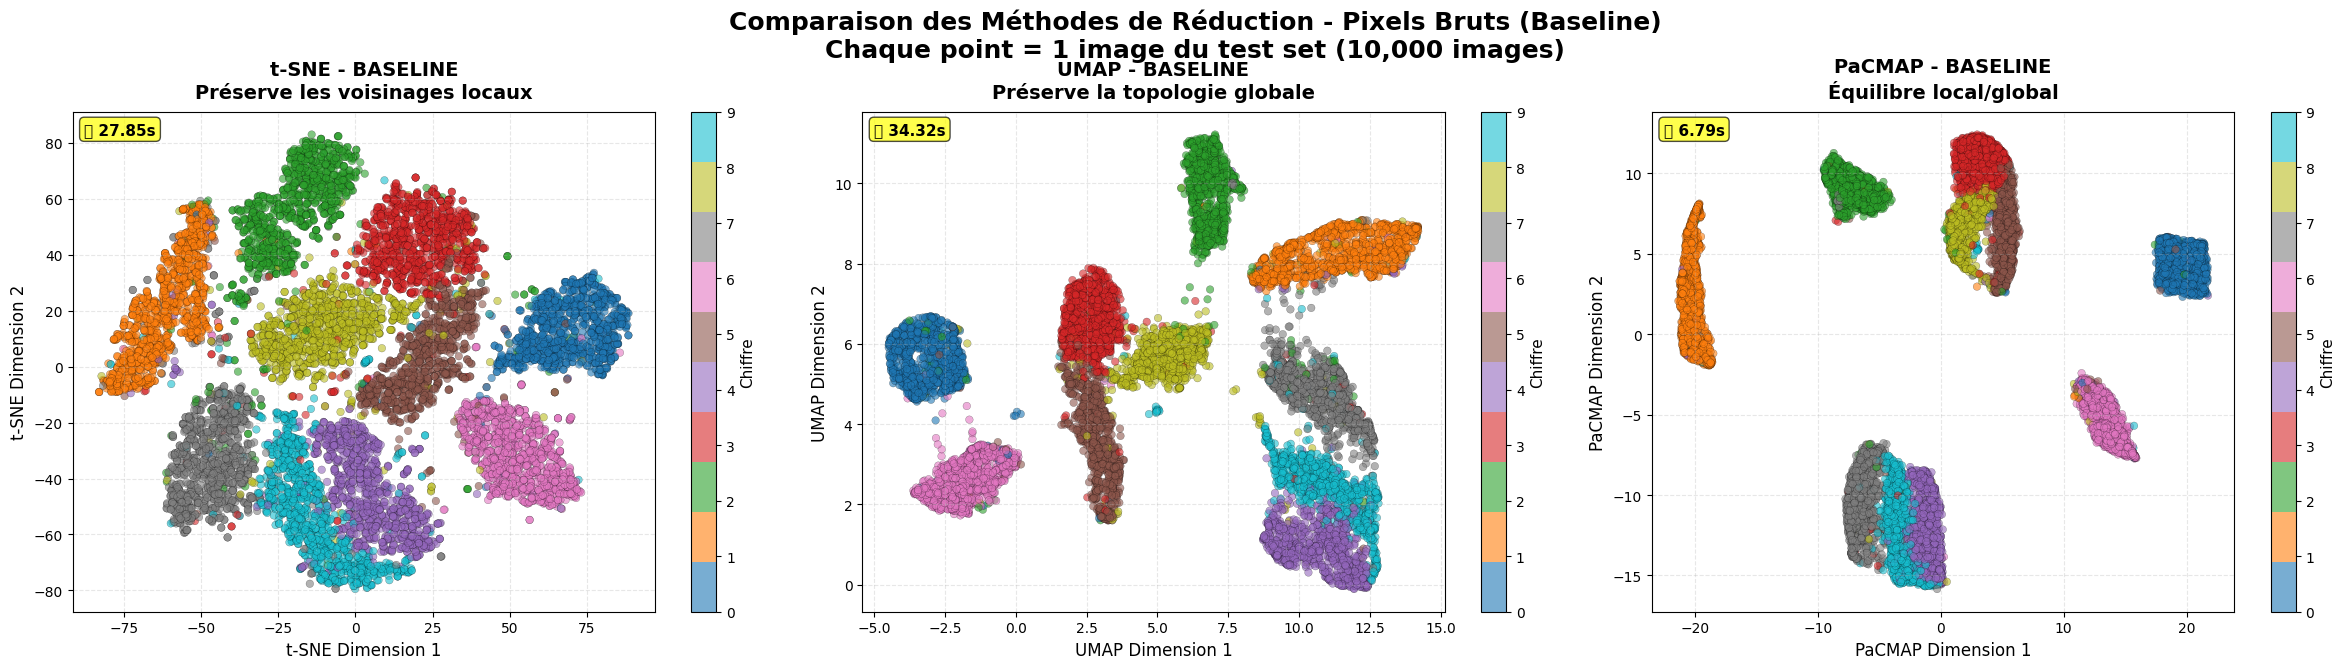

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_reduction_comparison_1x3.png


In [28]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║        GRAPHIQUE 9 : COMPARAISON t-SNE, UMAP, PaCMAP (1×3)              ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Comparaison 1×3")

fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Comparaison des Méthodes de Réduction - Pixels Bruts (Baseline)\n'
             'Chaque point = 1 image du test set (10,000 images)',
             fontsize=18, fontweight='bold', y=0.95)

methods_plot = [
    ('t-SNE', embeddings_tsne_raw, axes[0], 'Préserve les voisinages locaux'),
    ('UMAP', embeddings_umap_raw, axes[1], 'Préserve la topologie globale'),
    ('PaCMAP', embeddings_pacmap_raw, axes[2], 'Équilibre local/global')
]

for method_name, data, ax, subtitle in methods_plot:
    # Scatter plot
    scatter = ax.scatter(
        data[:, 0], data[:, 1],
        c=y_true, cmap='tab10', 
        alpha=0.6, s=30,
        edgecolors='black', linewidth=0.2
    )
    
    # Titre et labels
    ax.set_title(f'{method_name} - BASELINE\n{subtitle}',
                 fontsize=14, pad=10, fontweight='bold')
    ax.set_xlabel(f'{method_name} Dimension 1', fontsize=12)
    ax.set_ylabel(f'{method_name} Dimension 2', fontsize=12)
    ax.grid(alpha=0.3, linestyle='--')
    
    # Annotation temps
    time_text = f"⏱️ {results_raw[method_name]['time']:.2f}s"
    ax.text(0.02, 0.98, time_text, transform=ax.transAxes,
           fontsize=11, verticalalignment='top', fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', 
                    alpha=0.7, edgecolor='black'))
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax, ticks=range(10))
    cbar.set_label('Chiffre', fontsize=11)

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_reduction_comparison_1x3.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_reduction_comparison_1x3.png'}")


# 🔢 CELLULE 17 : Graphique - Vue par Classe (3×10)


📊 Génération du graphique : Vue par classe (3×10)


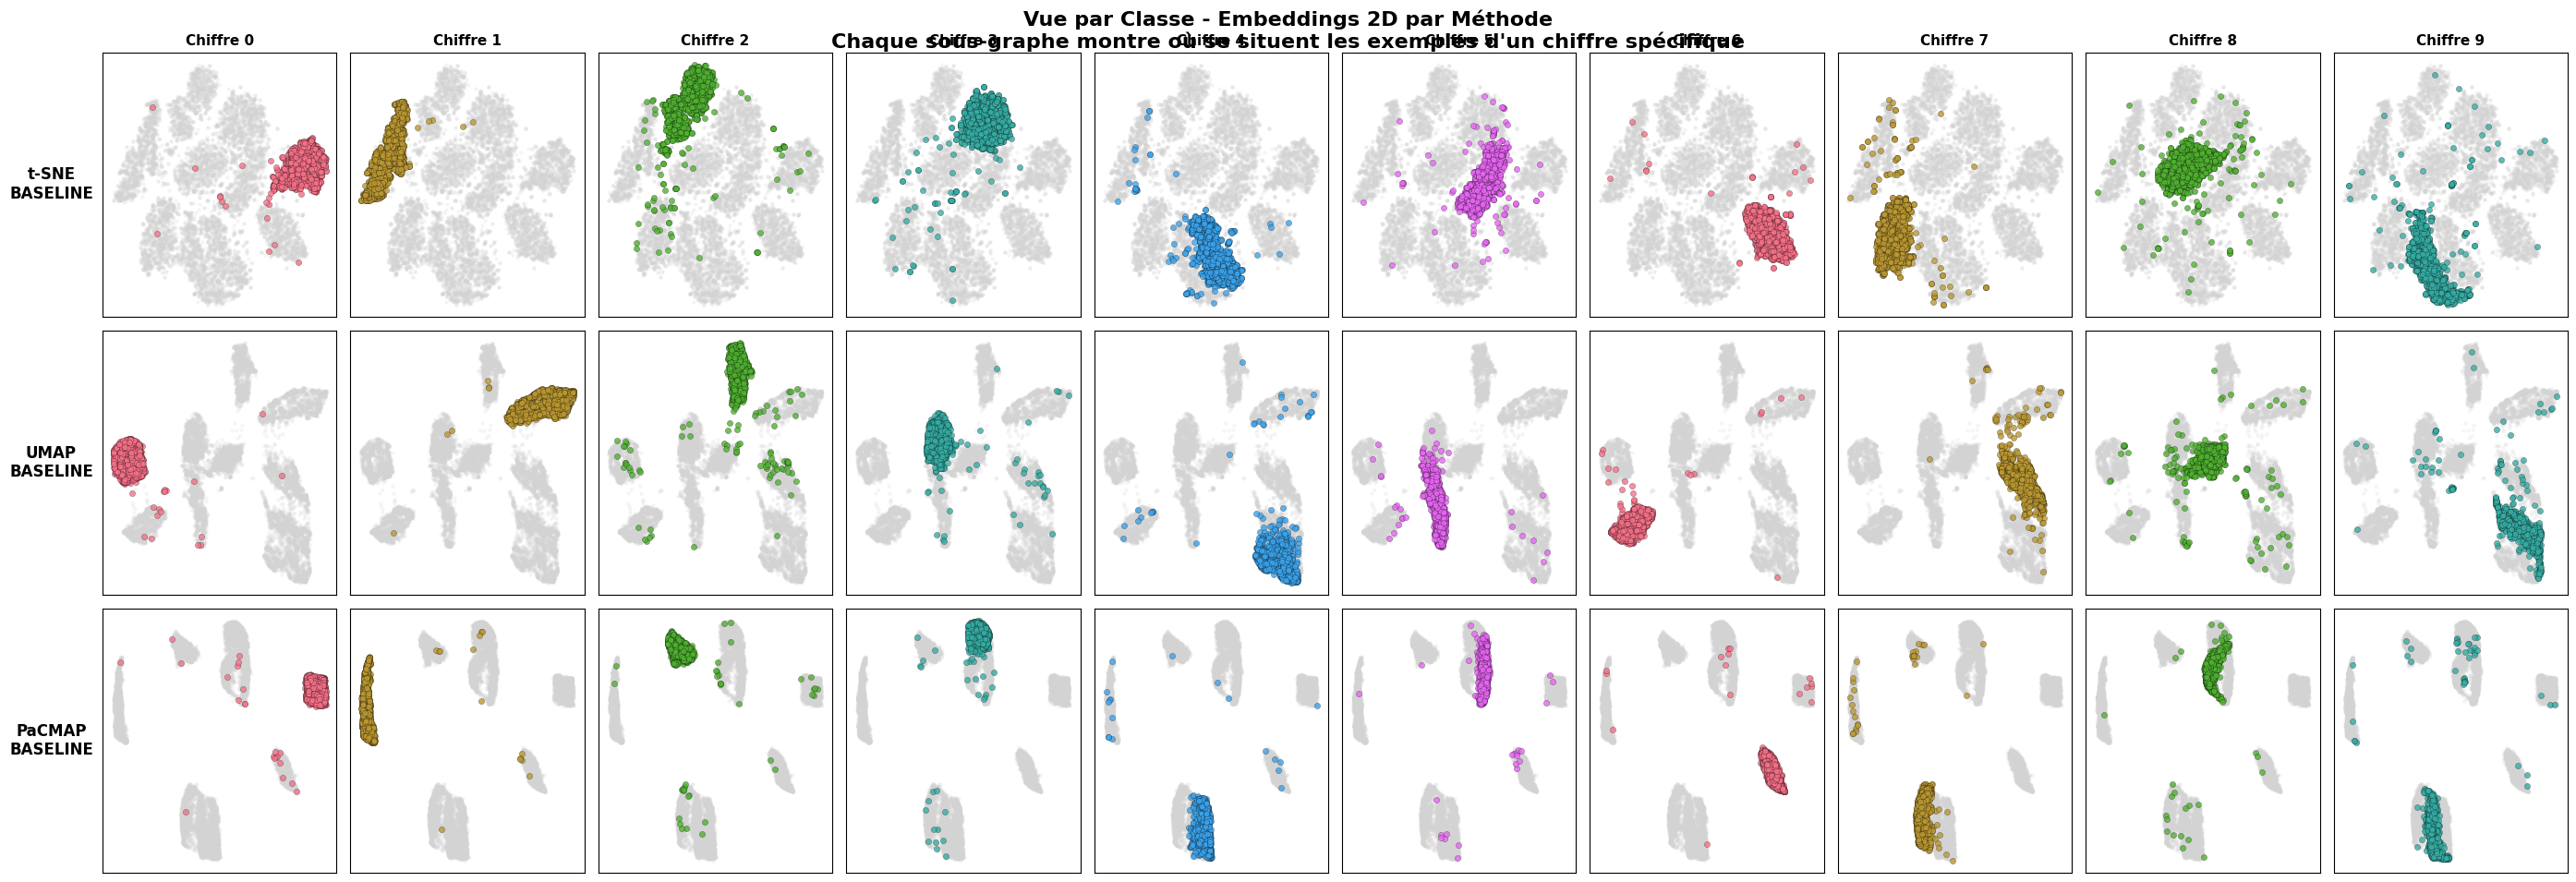

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_reduction_per_class_3x10.png


In [30]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║             GRAPHIQUE 10 : VUE PAR CLASSE (grille 3×10)                  ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Vue par classe (3×10)")

fig, axes = plt.subplots(3, 10, figsize=(28, 10))
fig.suptitle('Vue par Classe - Embeddings 2D par Méthode\n'
             'Chaque sous-graphe montre où se situent les exemples d\'un chiffre spécifique',
             fontsize=16, fontweight='bold', y=0.95)

methods_data = [
    ('t-SNE', embeddings_tsne_raw),
    ('UMAP', embeddings_umap_raw),
    ('PaCMAP', embeddings_pacmap_raw)
]

for row, (method_name, data) in enumerate(methods_data):
    for digit in range(10):
        ax = axes[row, digit]
        
        # Masque pour le chiffre actuel
        mask_digit = (y_true == digit)
        
        # Background (tous les autres chiffres en gris)
        ax.scatter(data[~mask_digit, 0], data[~mask_digit, 1],
                   c='lightgray', alpha=0.15, s=5)
        
        # Chiffre actuel en couleur
        ax.scatter(data[mask_digit, 0], data[mask_digit, 1],
                   c=f'C{digit}', alpha=0.8, s=20,
                   edgecolors='black', linewidth=0.2)
        
        # Labels
        if digit == 0:
            ax.set_ylabel(f'{method_name}\nBASELINE',
                         fontsize=12, fontweight='bold',
                         rotation=0, labelpad=40, va='center')
        
        if row == 0:
            ax.set_title(f'Chiffre {digit}',
                        fontsize=11, fontweight='bold')
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(alpha=0.2, linestyle='--')

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_reduction_per_class_3x10.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_reduction_per_class_3x10.png'}")


# ⚡ CELLULE 18 : Graphique - Performance vs Qualité


📊 Génération du graphique : Compromis vitesse/qualité


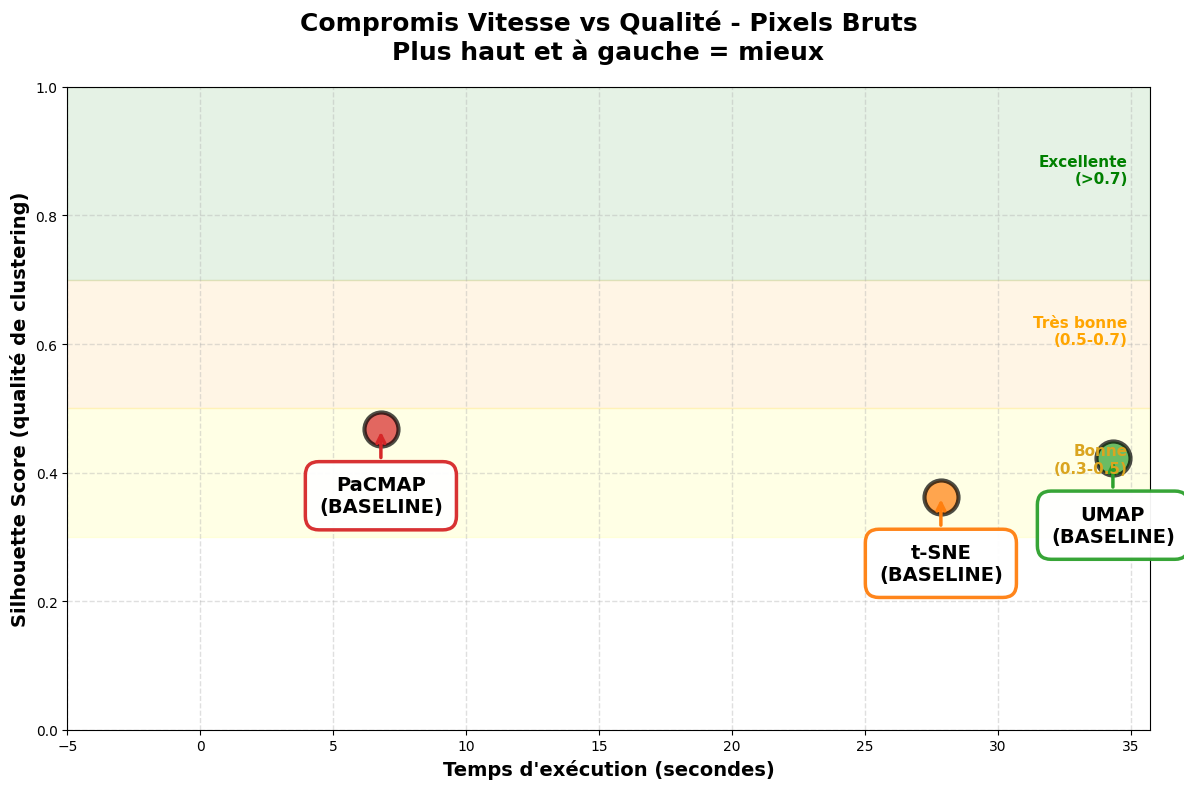

✅ Graphique sauvegardé : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques\mnist_speed_quality_tradeoff.png

✅ ANALYSE EXPLORATOIRE TERMINÉE
📁 24 graphiques sauvegardés dans : c:\Users\romua\Documents\La_Plateforme_\Projet 6 - Handwritten Digits Classification\Handwritten-Digits-Classification\graphiques


In [31]:
"""
╔══════════════════════════════════════════════════════════════════════════╗
║          GRAPHIQUE 11 : PERFORMANCE vs QUALITÉ (Speed/Quality)          ║
╚══════════════════════════════════════════════════════════════════════════╝
"""

print("\n📊 Génération du graphique : Compromis vitesse/qualité")

fig, ax = plt.subplots(figsize=(12, 8))

methods_list = ['t-SNE', 'UMAP', 'PaCMAP']
times = [metrics_raw[m]['time'] for m in methods_list]
silhouettes = [metrics_raw[m]['silhouette'] for m in methods_list]
colors = ['#ff7f0e', '#2ca02c', '#d62728']

# Points
for i, method in enumerate(methods_list):
    ax.scatter(times[i], silhouettes[i], s=600, c=colors[i], alpha=0.7,
              edgecolors='black', linewidth=3, zorder=3)
    
    # Annotations
    ax.annotate(f'{method}\n(BASELINE)',
               (times[i], silhouettes[i]),
               fontsize=14, fontweight='bold', ha='center',
               xytext=(0, -60), textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.7', facecolor='white',
                        edgecolor=colors[i], linewidth=2.5, alpha=0.95),
               arrowprops=dict(arrowstyle='->', lw=2.5, color=colors[i]))

# Configuration
ax.set_xlabel('Temps d\'exécution (secondes)', fontsize=14, fontweight='bold')
ax.set_ylabel('Silhouette Score (qualité de clustering)', fontsize=14, fontweight='bold')
ax.set_title('Compromis Vitesse vs Qualité - Pixels Bruts\n'
             'Plus haut et à gauche = mieux',
             fontsize=18, fontweight='bold', pad=20)
ax.grid(alpha=0.4, linestyle='--', linewidth=1)
ax.set_xlim(left=-5)
ax.set_ylim([0, 1])

# Zones de qualité
ax.axhspan(0.7, 1.0, alpha=0.1, color='green', zorder=0)
ax.axhspan(0.5, 0.7, alpha=0.1, color='orange', zorder=0)
ax.axhspan(0.3, 0.5, alpha=0.1, color='yellow', zorder=0)

# Annotations des zones
ax.text(0.98, 0.85, 'Excellente\n(>0.7)', transform=ax.transAxes,
        fontsize=11, ha='right', color='green', fontweight='bold')
ax.text(0.98, 0.60, 'Très bonne\n(0.5-0.7)', transform=ax.transAxes,
        fontsize=11, ha='right', color='orange', fontweight='bold')
ax.text(0.98, 0.40, 'Bonne\n(0.3-0.5)', transform=ax.transAxes,
        fontsize=11, ha='right', color='goldenrod', fontweight='bold')

plt.tight_layout()
plt.savefig(GRAPH_DIR / 'mnist_speed_quality_tradeoff.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : {GRAPH_DIR / 'mnist_speed_quality_tradeoff.png'}")

print("\n" + "="*70)
print("✅ ANALYSE EXPLORATOIRE TERMINÉE")
print("="*70)
print(f"📁 {len(list(GRAPH_DIR.glob('*.png')))} graphiques sauvegardés dans : {GRAPH_DIR}")
